<a href="https://colab.research.google.com/github/AkashBhardwaj9078/Demo_git_work/blob/main/embedding_incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes
!unzip "/content/human-emotions-datasethes.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/727.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/728.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/729.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/73.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/730.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/731.jpg  
  inflating: /content/dataset/EmotionsDataset/data/no

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout, RandomFlip, RandomRotation, Resizing, Rescaling
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers  import L2, L1
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
train_img=image_dataset_from_directory(
    "/content/dataset/EmotionsDataset_Splitted/data/train",
     color_mode="rgb",
    image_size=(256,256),
    batch_size=32,
    label_mode="categorical",
    shuffle=True,
    seed=42,


)


test_img=image_dataset_from_directory(
    "/content/dataset/EmotionsDataset_Splitted/data/test",
    color_mode="rgb",


    image_size=(256,256),
    batch_size=32,
    label_mode="categorical",
    shuffle=True,
    seed=42,

)


Found 3152 files belonging to 4 classes.
Found 788 files belonging to 4 classes.


In [ ]:
import numpy as np
class_names=train_img.class_names
class_names

['angry', 'happy', 'nothing', 'sad']

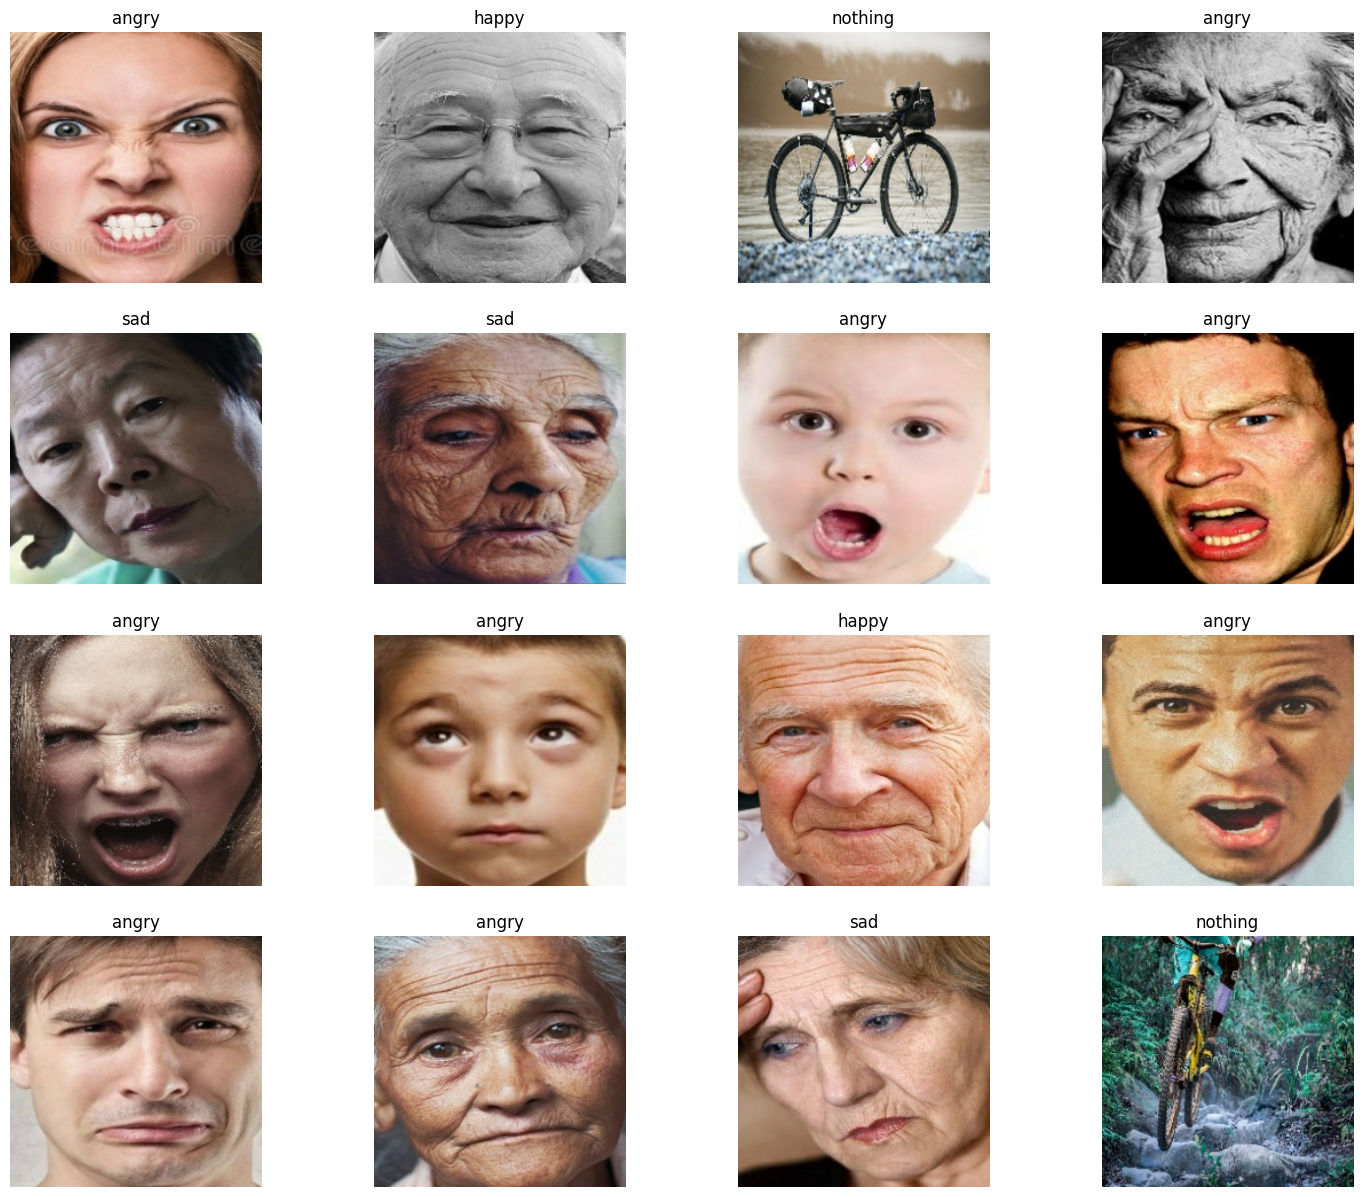

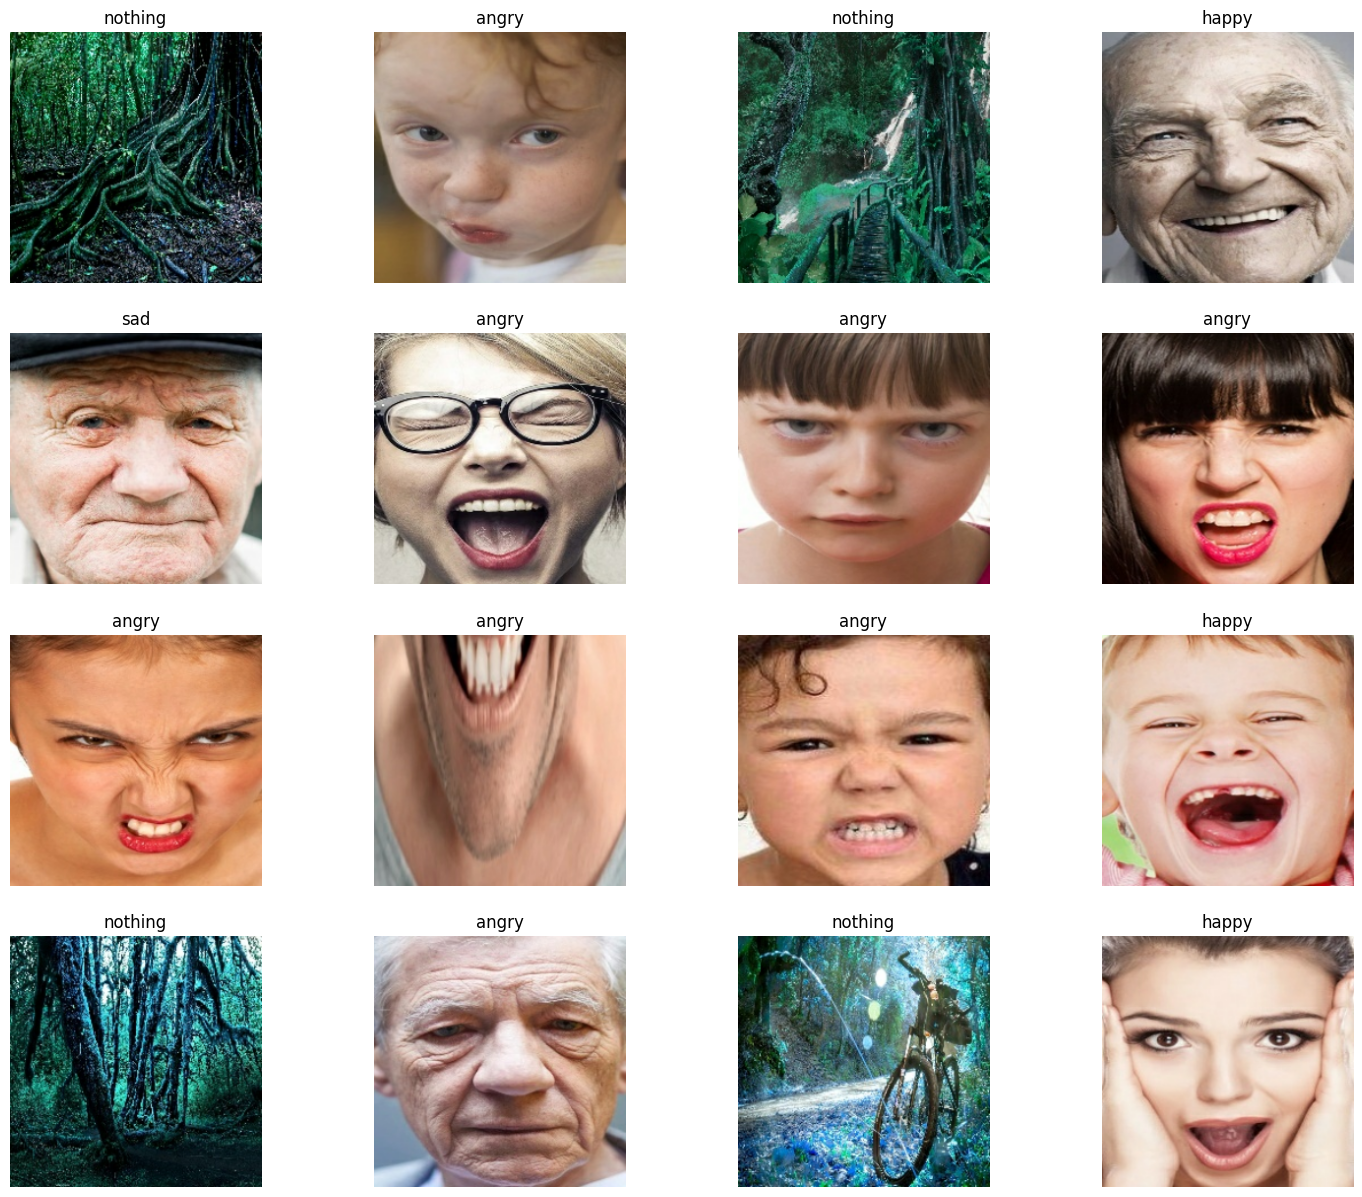

In [ ]:
for img,labels in train_img.take(2):
  plt.figure(figsize=(18,15))
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(img[i].numpy().astype("uint32"))
    plt.axis("off")
    # print(np.argamax(labels[i]))
    plt.title(class_names[np.argmax(labels[i])])


In [ ]:
import tensorflow as tf
lam=0.37
rx=tf.cast(tfp.distributions.Uniform(0, 256).sample(1)[0],tf.int32)
ry=tf.cast(tfp.distributions.Uniform(0, 256).sample(1)[0],tf.int32)

rw=tf.cast(256*tf.math.sqrt(1-lam),tf.int32)
rh=tf.cast(256*tf.math.sqrt(1-lam),tf.int32)

rx=tf.clip_by_value(rx-rw//2,0,255)
ry=tf.clip_by_value(ry-rh//2,0,255)

rx_t=tf.clip_by_value(rx+rw//2,0,255)
ry_t=tf.clip_by_value(ry+rh//2,0,255)


rw=rx_t-rx
if rw==0:
  rw=1
rh=ry_t-ry
if rh==0:
  rh=1

rx,ry,rw,rh

(<tf.Tensor: shape=(), dtype=int32, numpy=91>,
 <tf.Tensor: shape=(), dtype=int32, numpy=60>,
 <tf.Tensor: shape=(), dtype=int32, numpy=101>,
 <tf.Tensor: shape=(), dtype=int32, numpy=101>)

In [ ]:
import tensorflow as tf
class LeNet:
    def __init__(self,filter):
        self.conv1 = Conv2D(filter, 5)
        self.pool1 = tf.keras.layers.MaxPooling2D(2)
        self.conv2 = Conv2D(16, 5)
        self.pool2 =tf.keras.layers.MaxPooling2D(2)
        self.flatten = Flatten()
        self.dense1 = Dense(120, activation='relu')
        self.dense2 = Dense(84, activation='relu')
        self.dense3 = Dense(3, activation='softmax')

    def __call__(self, input):
        x = self.conv1(input)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x


In [ ]:
model = LeNet(6)
y=tf.keras.layers.Input(shape=(256,256,3))
x=model(y)

In [ ]:
lenet_model_func = Model(y, x, name = "Lenet_Model")

In [ ]:
lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 252, 252, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 59536)             

In [ ]:

IM_SIZE = 256
len_mod = tf.keras.Sequential([
                             InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),

                             Conv2D(filters = 6, kernel_size = 3, strides=1, padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D (pool_size = 2, strides= 2),

                             Conv2D(filters = 16, kernel_size = 3, strides=1, padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D (pool_size = 2, strides= 2),

                             Flatten(),

                             Dense(100,  "relu"),
                             BatchNormalization(),

                             Dense(10, "relu"),
                             BatchNormalization(),

                             Dense(4, "sigmoid"),

])

In [ ]:
def cce(fact):
  def loss(y_true,y_pred):
    ls=tf.keras.losses.categorical_crossentropy(y_true,y_pred,from_logits=False)
    return ls*fact
  return loss

In [ ]:
# prompt: import all the metrics

from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy


In [ ]:
metrics=[Precision(name="precision"),Recall(name="recall"),AUC(name="AUC")]

In [ ]:
# prompt: import and initialize callbacks

# Import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau

# Initialize callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Assign callbacks to a list
callbacks = [early_stopping, model_checkpoint, reduce_lr_on_plateau]


In [ ]:
len_mod.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=cce(0.2),
    metrics=metrics
)

In [ ]:
history=len_mod.fit(
    train_img,
    validation_data=test_img,
    epochs=5,
    callbacks=callbacks
)

Epoch 1/5
99/99 [==============================] - 202s 2s/step - loss: 0.1489 - precision: 0.4670 - recall: 0.8328 - AUC: 0.8571 - val_loss: 0.1611 - val_precision: 0.4527 - val_recall: 0.8312 - val_AUC: 0.8451 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/5
99/99 [==============================] - 198s 2s/step - loss: 0.1159 - precision: 0.5120 - recall: 0.8902 - AUC: 0.9051 - val_loss: 0.1778 - val_precision: 0.4282 - val_recall: 0.8135 - val_AUC: 0.8250 - lr: 0.0010
Epoch 3/5
99/99 [==============================] - 190s 2s/step - loss: 0.0893 - precision: 0.5517 - recall: 0.9400 - AUC: 0.9382 - val_loss: 0.1588 - val_precision: 0.4850 - val_recall: 0.8845 - val_AUC: 0.8731 - lr: 0.0010
Epoch 4/5
99/99 [==============================] - 190s 2s/step - loss: 0.0800 - precision: 0.5609 - recall: 0.9543 - AUC: 0.9508 - val_loss: 0.1715 - val_precision: 0.5204 - val_recall: 0.8249 - val_AUC: 0.8580 - lr: 0.0010
Epoch 5/5
99/99 [==============================] - 197s 2s/step - loss: 0.0664 - precision: 0.5806 - recall: 0.9692 - AUC: 0.9649 - val_loss: 0.1740 - val_precision: 0.4927 - val_recall: 0.8579 - val_AUC: 0.8705 - lr: 0.0010


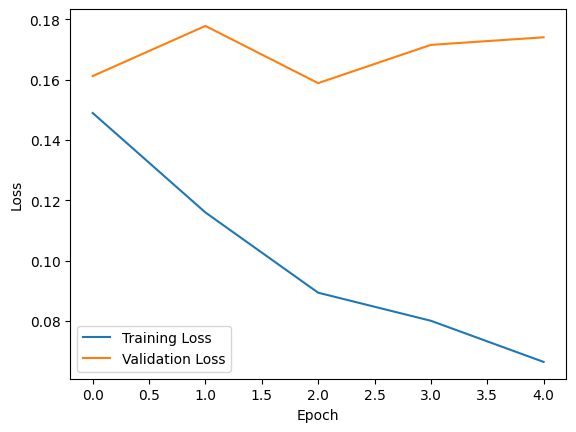

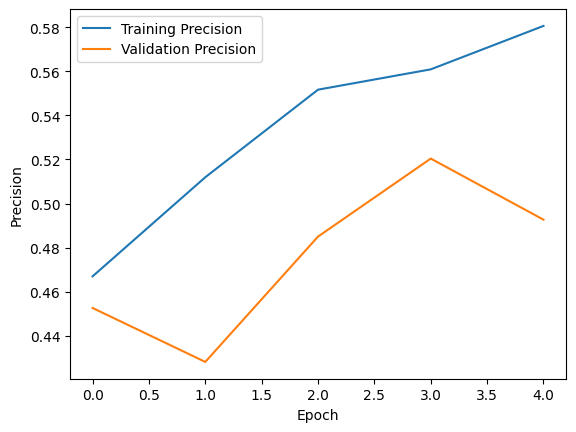

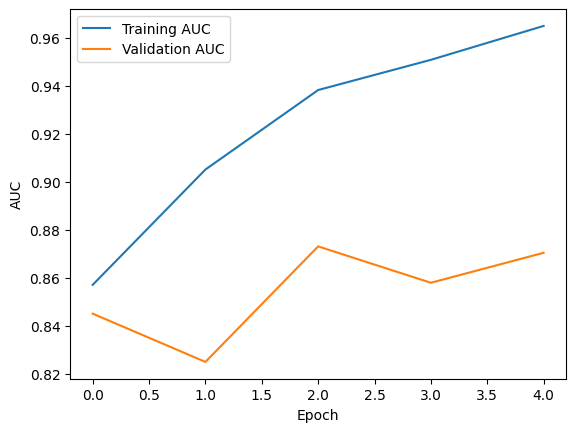

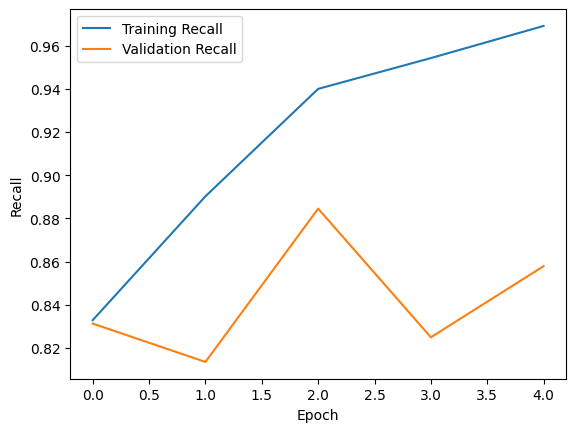

In [ ]:
# prompt: plot all the requsite graphs from history

import matplotlib.pyplot as plt



# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




# Plot the training and validation accuracy
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()




# Plot the training and validation AUC
plt.plot(history.history['AUC'], label='Training AUC')
plt.plot(history.history['val_AUC'], label='Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()



# Plot the training and validation recall
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()



In [ ]:
# prompt: construct resnet34 from scratch

import tensorflow as tf

class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, **kwargs):
        super().__init__(**kwargs)
        self.conv1 = tf.keras.layers.Conv2D(filters, (3, 3), strides=strides, padding="same", use_bias=False)
        self.conv2 = tf.keras.layers.Conv2D(filters, (3, 3), strides=1, padding="same", use_bias=False)

        if strides != 1:
            self.conv3 = tf.keras.layers.Conv2D(filters, (1, 1), strides=strides, use_bias=False)
        else:
            self.conv3 = None

        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = tf.nn.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.conv3:
            inputs = self.conv3(inputs)

        x += inputs
        x = tf.nn.relu(x)

        return x


class ResNet34(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.conv1 = tf.keras.layers.Conv2D(64, (7, 7), strides=2, padding="same", use_bias=False)
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.pool1 = tf.keras.layers.MaxPool2D((3, 3), strides=2, padding="same")

        self.block1 = ResidualBlock(64, strides=1)
        self.block2 = ResidualBlock(64, strides=2)
        self.block3 = ResidualBlock(128, strides=2)
        self.block4 = ResidualBlock(256, strides=2)
        self.block5 = ResidualBlock(512, strides=2)

        self.avgpool = tf.keras.layers.GlobalAveragePooling2D()
        self.fc = tf.keras.layers.Dense(10, use_bias=False)

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = tf.nn.relu(x)
        x = self.pool1(x)

        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)

        x = self.avgpool(x)
        x = self.fc(x)

        return x

model = ResNet34()



In [ ]:
res34=ResNet34()

In [ ]:
res34(tf.zeros([1,256,256,3]))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
model=tf.keras.applications.efficientnet.EfficientNetB4(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling="avg"
)

In [ ]:

model.fit(
    train_img,
    validation_data=

)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB4
eff=EfficientNetB4(include_top=False,input_shape=(256,256,3),weights="imagenet")

for layers in eff.layers:
  layers.trainable=False
x=eff.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(120,activation="relu")(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(84,activation="relu")(x)
x=tf.keras.layers.Dense(4,activation="softmax")(x)
pre_effnet=Model(eff.input,x)
pre_effnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 256, 256, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 256, 256, 3)          0         ['normalization[0][0]'] 

In [ ]:
pre_effnet.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=cce(0.3),
    metrics=metrics
)

In [ ]:
history=pre_effnet.fit(
    train_img,
    validation_data=test_img,
    epochs=5,
    callbacks=callbacks
)

Epoch 1/5
87/99 [=========================>....] - ETA: 2:15 - loss: 0.2094 - precision: 0.7765 - recall: 0.6164 - AUC: 0.9135

In [ ]:
import tensorflow as tf

In [ ]:
vgg=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),

)

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
x

In [ ]:
feature_model=tf.keras.models.Model(vgg.input,[layers.output for layers in vgg.layers[1:]])

In [ ]:
feature_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread("/content/dataset/EmotionsDataset/data/happy/100.jpg")
test_image = cv2.resize(test_image, (256,256))


In [ ]:
x=tf.expand_dims(test_image,0)

In [ ]:
patches=tf.image.extract_patches(
    images=x,
    sizes=[1,16,16,1],
    strides=[1,16,16,1],
    rates=[1,1,1,1],
    padding="VALID"

)
patches

<tf.Tensor: shape=(1, 16, 16, 768), dtype=uint8, numpy=
array([[[[ 62,  88, 104, ...,  10,  22,  28],
         [ 31,  47,  54, ...,  21,  33,  40],
         [ 37,  48,  56, ...,  21,  33,  39],
         ...,
         [ 80, 101, 129, ...,  85, 109, 136],
         [ 59,  79, 104, ...,  60,  81, 108],
         [106, 119, 135, ...,  86, 103, 116]],

        [[ 17,  34,  43, ...,   8,  14,  25],
         [  7,  19,  25, ...,   2,  10,  17],
         [ 14,  26,  32, ...,  20,  32,  38],
         ...,
         [110, 137, 164, ..., 117, 146, 173],
         [ 89, 113, 143, ...,  98, 130, 165],
         [ 57,  76, 103, ...,  62,  88, 118]],

        [[  4,  12,  21, ...,   4,  10,  21],
         [ 11,  20,  30, ...,   6,  12,  23],
         [ 22,  31,  39, ...,  13,  23,  33],
         ...,
         [139, 165, 189, ..., 144, 170, 194],
         [116, 145, 172, ..., 127, 155, 186],
         [ 97, 127, 162, ..., 112, 143, 174]],

        ...,

        [[ 50,  68,  97, ...,  58,  69,  99],
        

In [ ]:
patches=tf.reshape(patches,(1,-1,768))

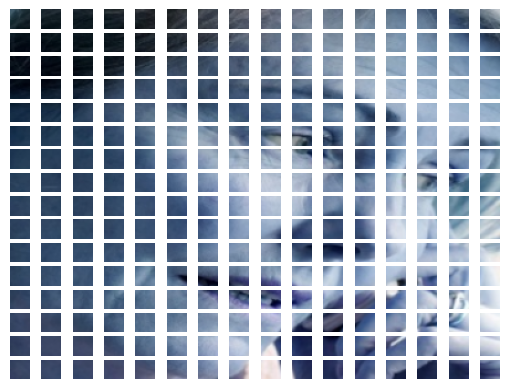

In [ ]:
for i in range(patches.shape[1]):
  plt.subplot(16,16,i+1)
  plt.imshow(tf.reshape(patches[0,i],(16,16,3)))
  plt.axis("off")


In [ ]:
class PatchEncoder:
  # linear projection of flattened patches
  # create one_positional_embedding(range of n_patches) +linear_projection(extracted_patches)(dense)
  def __init__(self,n_patches,hidden_size):
    super(PatchEncoder).__init__()
    self.n_patches=n_patches
    self.hidden_size=hidden_size
    self.linear_projection=tf.keras.layers.Dense(hidden_size)
    self.bn=tf.keras.layers.BatchNormalization()
    self.positional_embedding=tf.keras.layers.Embedding(n_patches,hidden_size)
  def call(self,input):
    patches=tf.image.extract_patches(
        images=tf.expand_dims(input,0),
        sizes=[1,16,16,1],
        strides=[1,16,16,1],
        rates=[1,1,1,1],
        padding="VALID"

    )
    patches=tf.reshape(patches,(tf.shape(patches)[0],-1,patches.shape[-1]))
    embedding_input=tf.range(start=0,limit=self.n_patches,delta=1)
    output = self.linear_projection(patches) + self.positional_embedding(embedding_input)

    return output



In [ ]:
class TransformerBlock:
  def __init__(self,hidden_size,num_heads):
    super(TransformerBlock,self).__init__()
    self.norm1=tf.keras.layers.LayerNormalization()
    self.norm2=tf.keras.layers.LayerNormalization()
    self.attn=tf.keras.layers.MultiHeadAttention(num_heads=num_heads,key_dim=hidden_size)
    self.dense1=tf.keras.layers.Dense(hidden_size,activation=tf.nn.gelu)
    self.dense2=tf.keras.layers.Dense(hidden_size,activation=tf.nn.gelu)

  def call(self,input):
    x=self.norm1(input)
    x=self.attn(x)
    x1=tf.keras.layers.Add()([x,input])
    x2=self.norm2(x1)
    x2=self.dense1(x2)
    output=self.dense2(x2)
    x3=tf.keras.layers.Add()([x1,output])
    return x3



In [ ]:
tf.keras.layers.Embedding(1000,64)(np.random.randint(1000)).shape
tf.keras.layers.Dense(64)(patches).shape

TensorShape([1, 256, 64])

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(1000,64))
inp=np.random.randint(1000,size=(32,10))
model.compile("adam",'mse')
pred=model.predict(inp)
print(pred.shape)
pred


1/1 [==============================] - 0s 51ms/step
(32, 10, 64)


array([[[ 0.00182392,  0.03506247,  0.0408644 , ...,  0.04054433,
         -0.02886072, -0.00925263],
        [ 0.04583109,  0.00470018, -0.00778308, ...,  0.00211068,
          0.00291384, -0.02331085],
        [-0.02344625,  0.04001195, -0.02921486, ..., -0.02026845,
          0.02060989, -0.02984074],
        ...,
        [ 0.04690372, -0.04507368,  0.04461808, ..., -0.01056031,
          0.02652172, -0.0429993 ],
        [ 0.04446298, -0.0074053 ,  0.0159612 , ...,  0.04302708,
          0.01921682,  0.02351821],
        [-0.037986  , -0.00881477, -0.02835373, ..., -0.00858595,
         -0.02682128, -0.00533303]],

       [[ 0.01193889,  0.03589715, -0.00273776, ...,  0.00755472,
         -0.01019298, -0.03136574],
        [-0.02083827,  0.02838625, -0.02580793, ..., -0.01530629,
          0.02251918,  0.02559293],
        [ 0.01671126, -0.04840937, -0.00093869, ...,  0.01843533,
         -0.04627801,  0.03569278],
        ...,
        [-0.01894893, -0.03715152,  0.0424074 , ...,  

In [ ]:
tr=TransformerBlock(8,768)
tr(tf.zeros([1,256,768]))

TypeError: 'TransformerBlock' object is not callable